## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [ ]:
# Check Python version
import sys
print(sys.version)

3.12.11 (main, Jun  4 2025, 08:56:18) [GCC 11.4.0]


# Observation:
* Google updated environment

In [ ]:
# Upgrade build tools first
!pip install -q --upgrade pip setuptools wheel

# Py3.12-compatible pins
!pip install -q \
  numpy==2.0.2 \
  pandas==2.2.2 \
  matplotlib==3.8.4 \
  seaborn==0.13.2 \
  scikit-learn==1.6.1 \
  sklearn-pandas==2.2.0 \
  xgboost==2.0.3

# Observation:
* Updated Libraries for compatiblity

**Note**:

1. After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab), write the relevant code for the project from the next cell, and run all cells sequentially from the next cell.

2. On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

In [ ]:
# Core stack libs and alias
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import xgboost as xgb

# Import tools in the sklearn lib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, make_scorer, f1_score
from sklearn import tree
from xgboost import XGBClassifier


# Set the float format to .00 numerical display
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Version verification
print("numpy:", np.__version__)
print("pandas:", pd.__version__)
print("matplotlib:", matplotlib.__version__)
print("seaborn:", sns.__version__)
print("sklearn:", sklearn.__version__)
print("xgboost:", xgb.__version__)

numpy: 2.0.2
pandas: 2.2.2
matplotlib: 3.8.4
seaborn: 0.13.2
sklearn: 1.6.1
xgboost: 2.0.3


In [ ]:
# Mount my Google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Loading the dataset

In [ ]:
# Load the dataset provided by AllLife Bank
df=pd.read_csv('/content/Loan_Modelling.csv')

## Data Overview

* Observations
* Sanity checks

In [ ]:
# Shape of dataset (Rows & Columns)
print("Shape:", df.shape)

Shape: (5000, 14)


# Observation:
* The dataset consists of 5000 rows x 14 columns = 70,000 data points good for training although we only want the numerical data for the model training and validation

In [ ]:
# First 5 rows
df.head() .T

,0,1,2,3,4
ID,1.00,2.00,3.00,4.00,5.00
Age,25.00,45.00,39.00,35.00,35.00
Experience,1.00,19.00,15.00,9.00,8.00
Income,49.00,34.00,11.00,100.00,45.00
ZIPCode,91107.00,90089.00,94720.00,94112.00,91330.00
Family,4.00,3.00,1.00,1.00,4.00
CCAvg,1.60,1.50,1.00,2.70,1.00
Education,1.00,1.00,1.00,2.00,2.00
Mortgage,0.00,0.00,0.00,0.00,0.00
Personal_Loan,0.00,0.00,0.00,0.00,0.00


In [ ]:
# Last 5 rows
df.tail() .T

,4995,4996,4997,4998,4999
ID,4996.00,4997.00,4998.00,4999.00,5000.00
Age,29.00,30.00,63.00,65.00,28.00
Experience,3.00,4.00,39.00,40.00,4.00
Income,40.00,15.00,24.00,49.00,83.00
ZIPCode,92697.00,92037.00,93023.00,90034.00,92612.00
Family,1.00,4.00,2.00,3.00,3.00
CCAvg,1.90,0.40,0.30,0.50,0.80
Education,3.00,1.00,3.00,2.00,1.00
Mortgage,0.00,85.00,0.00,0.00,0.00
Personal_Loan,0.00,0.00,0.00,0.00,0.00


In [ ]:
# Data types & non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


# Observation:
* There are no null values
* Data type confirms that all values are numerical

In [ ]:
# Unique values per column
df.nunique()

,0
ID,5000
Age,45
Experience,47
Income,162
ZIPCode,467
Family,4
CCAvg,108
Education,3
Mortgage,347
Personal_Loan,2


# Observations:
* There are 7 columns that could have inbalances: Family, Education, Personal_Loan, Securities_Account, CD_Account, Online, and CreditCard.
* The Family and Education columns likely fall into sizes and levels.

In [ ]:
# Numeric summary (distribution, outliers)
df.describe() .T

,count,mean,std,min,25%,50%,75%,max
ID,5000.00,2500.50,1443.52,1.00,1250.75,2500.50,3750.25,5000.00
Age,5000.00,45.34,11.46,23.00,35.00,45.00,55.00,67.00
Experience,5000.00,20.10,11.47,-3.00,10.00,20.00,30.00,43.00
Income,5000.00,73.77,46.03,8.00,39.00,64.00,98.00,224.00
ZIPCode,5000.00,93169.26,1759.46,90005.00,91911.00,93437.00,94608.00,96651.00
Family,5000.00,2.40,1.15,1.00,1.00,2.00,3.00,4.00
CCAvg,5000.00,1.94,1.75,0.00,0.70,1.50,2.50,10.00
Education,5000.00,1.88,0.84,1.00,1.00,2.00,3.00,3.00
Mortgage,5000.00,56.50,101.71,0.00,0.00,0.00,101.00,635.00
Personal_Loan,5000.00,0.10,0.29,0.00,0.00,0.00,0.00,1.00


# Observations:
* **ID**: could be used as a unique ID and serves as the percentile values during EDA which line up nicely and the std is consistent with a value of 1443.5.
* **Ages**: looks good with range values between 23 - 67 and std value of 11.5.
* **Experience**: has a value of -3 for the min which is likely an error and will need correction for training, with a max value of 43 and std value of 11.5.
* **Income**: range values are from 8k to 224k which is a very large range and will need scaling to ensure it can be mapped correctly in certain model training.
* **Zipcode**: can be dropped as it adds no information it could cause noise in the model training.
* **Family**: values confirm that it is a size based multi-category from 1 - 4.
* **CCAvg**: tells me something is off here data points will likely be right skewed.
* **Education**: values confirm that it is a level based multi-category from 1 - 3.
* **Mortgage**: definitely shows an imbalance and will again likely be right skewed.
* **Personal loan**: is clearly a binary as min value is 0 and max value is 1, since we know the scope of the project this makes it an easy target variable.
* **Securities Account**, **CD Account**, and **Credit Card**: also show signs of being binary variables.
* **Online**: on the other hand shows that 59.6% of the AllLife Bank customers have an online account.

---

## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

In [ ]:
# Fix impossible Experience values in df (so EDA uses clean data)
exp_median = df.loc[df["Experience"] >= 0, "Experience"].median()
df["Experience"] = df["Experience"].apply(lambda x: exp_median if x < 0 else x)

# Sanity check
print("Experience min after fix:", df["Experience"].min())


Experience min after fix: 0.0


In [ ]:
# Create comparison data from loan and no loan customers
loan_customers = df[df['Personal_Loan'] == 1]
no_loan_customers = df[df['Personal_Loan'] == 0]

In [ ]:
# Check for binaries and possible imbalances
cat_cols = ['Family', 'Education', 'Personal_Loan', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard']

print("____________________________________\n")
print("=== CATAGORICAL SUMMARY ===")
print("____________________________________")
for col in cat_cols:
    print(f'\n-- {col} --\n')
    print(df[col].value_counts(normalize=True))
    print("____________________________________\n")

____________________________________

=== CATAGORICAL SUMMARY ===
____________________________________

-- Family --

Family
1   0.29
2   0.26
4   0.24
3   0.20
Name: proportion, dtype: float64
____________________________________


-- Education --

Education
1   0.42
3   0.30
2   0.28
Name: proportion, dtype: float64
____________________________________


-- Personal_Loan --

Personal_Loan
0   0.90
1   0.10
Name: proportion, dtype: float64
____________________________________


-- Securities_Account --

Securities_Account
0   0.90
1   0.10
Name: proportion, dtype: float64
____________________________________


-- CD_Account --

CD_Account
0   0.94
1   0.06
Name: proportion, dtype: float64
____________________________________


-- Online --

Online
1   0.60
0   0.40
Name: proportion, dtype: float64
____________________________________


-- CreditCard --

CreditCard
0   0.71
1   0.29
Name: proportion, dtype: float64
____________________________________



# Observations:
* There are several imbalances in the data including the target variable Personal_Loan with only 2 values (Yes) or (No) this binary has a imbalance of 90% with no loans (No) and 10% with loans (Yes).

In [ ]:
# Analyze target: Personal_loan and secondary binary variables
binary_cols = ['Personal_Loan', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard']

print("___________________________________\n")
print("=== BINARY VARIABLES ANALYSIS ===")
print("___________________________________")
for col in binary_cols:
    counts = df[col].value_counts()
    percentages = df[col].value_counts(normalize=True) * 100
    print(f'\n-- {col} --\n')
    print(f"  0: {counts[0]} ({percentages[0]:.1f}%)")
    print(f"  1: {counts[1]} ({percentages[1]:.1f}%)")
    print("_____________________________\n")

___________________________________

=== BINARY VARIABLES ANALYSIS ===
___________________________________

-- Personal_Loan --

  0: 4520 (90.4%)
  1: 480 (9.6%)
_____________________________


-- Securities_Account --

  0: 4478 (89.6%)
  1: 522 (10.4%)
_____________________________


-- CD_Account --

  0: 4698 (94.0%)
  1: 302 (6.0%)
_____________________________


-- Online --

  0: 2016 (40.3%)
  1: 2984 (59.7%)
_____________________________


-- CreditCard --

  0: 3530 (70.6%)
  1: 1470 (29.4%)
_____________________________



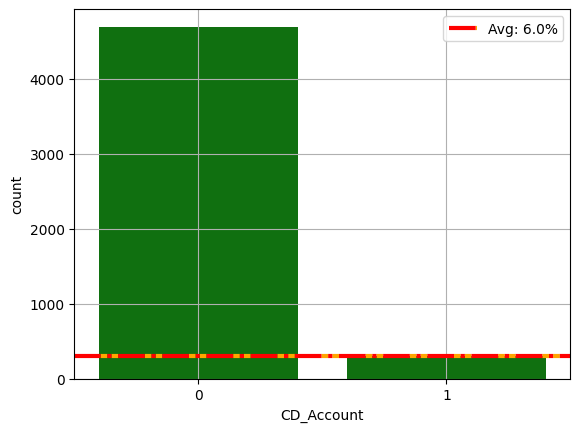

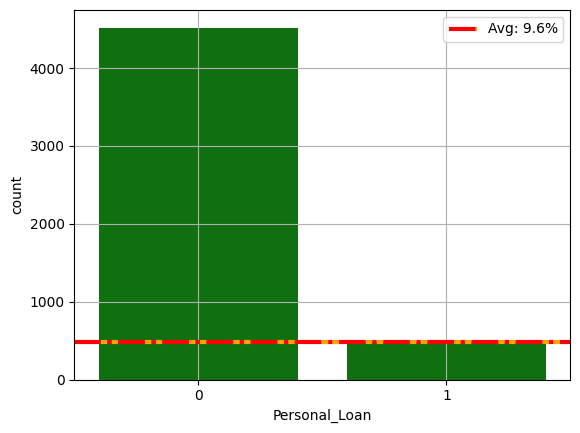

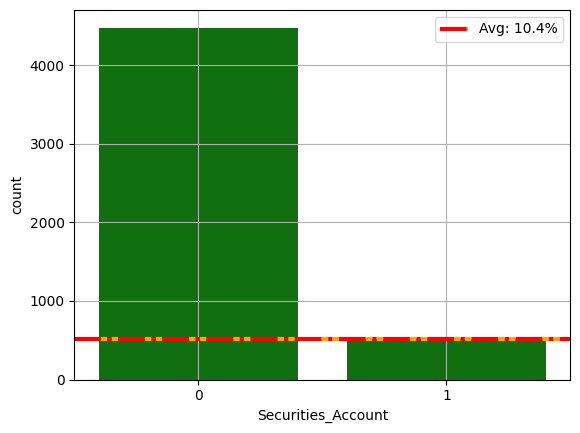

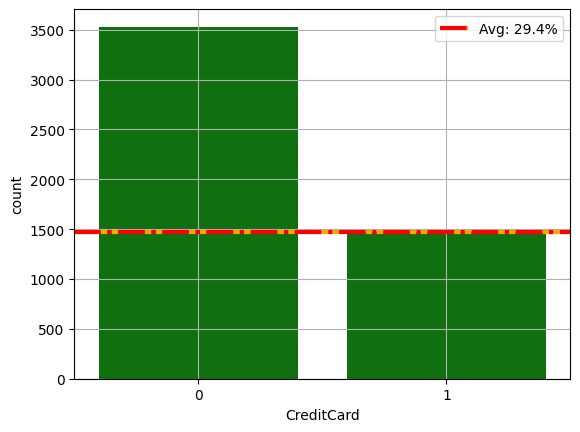

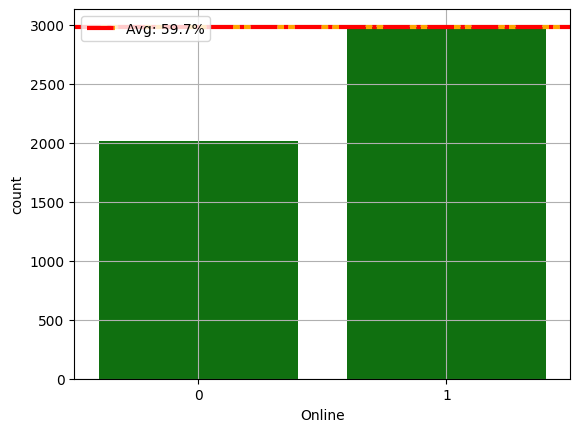

In [ ]:
# Bar plots of categorical features
for col in ['CD_Account', 'Personal_Loan', 'Securities_Account', 'CreditCard', 'Online']:
    sns.countplot(x=col, data=df, color='green')

 # Average line for proportion of 1s
    average_proportion = df[col].mean()
    plt.axhline(y=average_proportion * len(df), color='red', gapcolor= 'orange', linestyle='dashdot', linewidth=3, label=f'Avg: {average_proportion*100:.1f}%')

    plt.grid(True)
    plt.legend()
    plt.show()

# Observations:
Dropping the Family and Education columns we can analyze the variables for counts showing rarity of these offerings:
1. Highest rarity is CD Accounts with a 6% of customers
2. The target variable Personal_Loan is second in rarity with 9.6% and as noted previously does have an imbalance of 90.4% or 4,520 no loan customers and 9.6% or 480 loan customers.
3. Securities Account is third in rarity with 10.4% of customers
4. Credit Card falls in fourth for rarity with 29.4% of customers
5. Online takes fifth and last place for rarity with 59.7% of customers utilizing this offering

In [ ]:
# Compare characteristics of loan vs non-loan customers
print("_____________________________________________\n")
print("=== LOAN CUSTOMERS vs NON-LOAN CUSTOMERS ===")
print("_____________________________________________\n")

print(f"Loan Customers: {len(loan_customers)}")
print(f"Non-Loan Customers: {len(no_loan_customers)}")
print("___________________________________________________________________\n")

# Compare key numeric features
numeric_features = ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage']

print(f"{'Feature':<12} {'No Loan':<10} {'Loan':<10} {'Difference':<14} {'Difference %':<12}")
print("___________________________________________________________________\n")

for feature in numeric_features:
    no_loan_avg = no_loan_customers[feature].mean()
    loan_avg = loan_customers[feature].mean()
    difference = loan_avg - no_loan_avg
    pct_difference = (difference / no_loan_avg) * 100 if no_loan_avg != 0 else 0
    print(f"{feature:<13} {no_loan_avg:<9.2f} {loan_avg:<12.2f} {difference:<15.2f} {pct_difference:<12.1f}%")
    print("___________________________________________________________________")

_____________________________________________

=== LOAN CUSTOMERS vs NON-LOAN CUSTOMERS ===
_____________________________________________

Loan Customers: 480
Non-Loan Customers: 4520
___________________________________________________________________

Feature      No Loan    Loan       Difference     Difference %
___________________________________________________________________

Age           45.37     45.07        -0.30           -0.7        %
___________________________________________________________________
Experience    20.38     19.84        -0.54           -2.6        %
___________________________________________________________________
Income        66.24     144.75       78.51           118.5       %
___________________________________________________________________
Family        2.37      2.61         0.24            10.1        %
___________________________________________________________________
CCAvg         1.73      3.91         2.18            125.9       %
________

# Observations:
* Income, CCAvg, and Mortgage suggest loan acceptance is tied to more finacially stable and savy customers while there is minimal difference in the Age, Experience, and family between loan and non loan customers

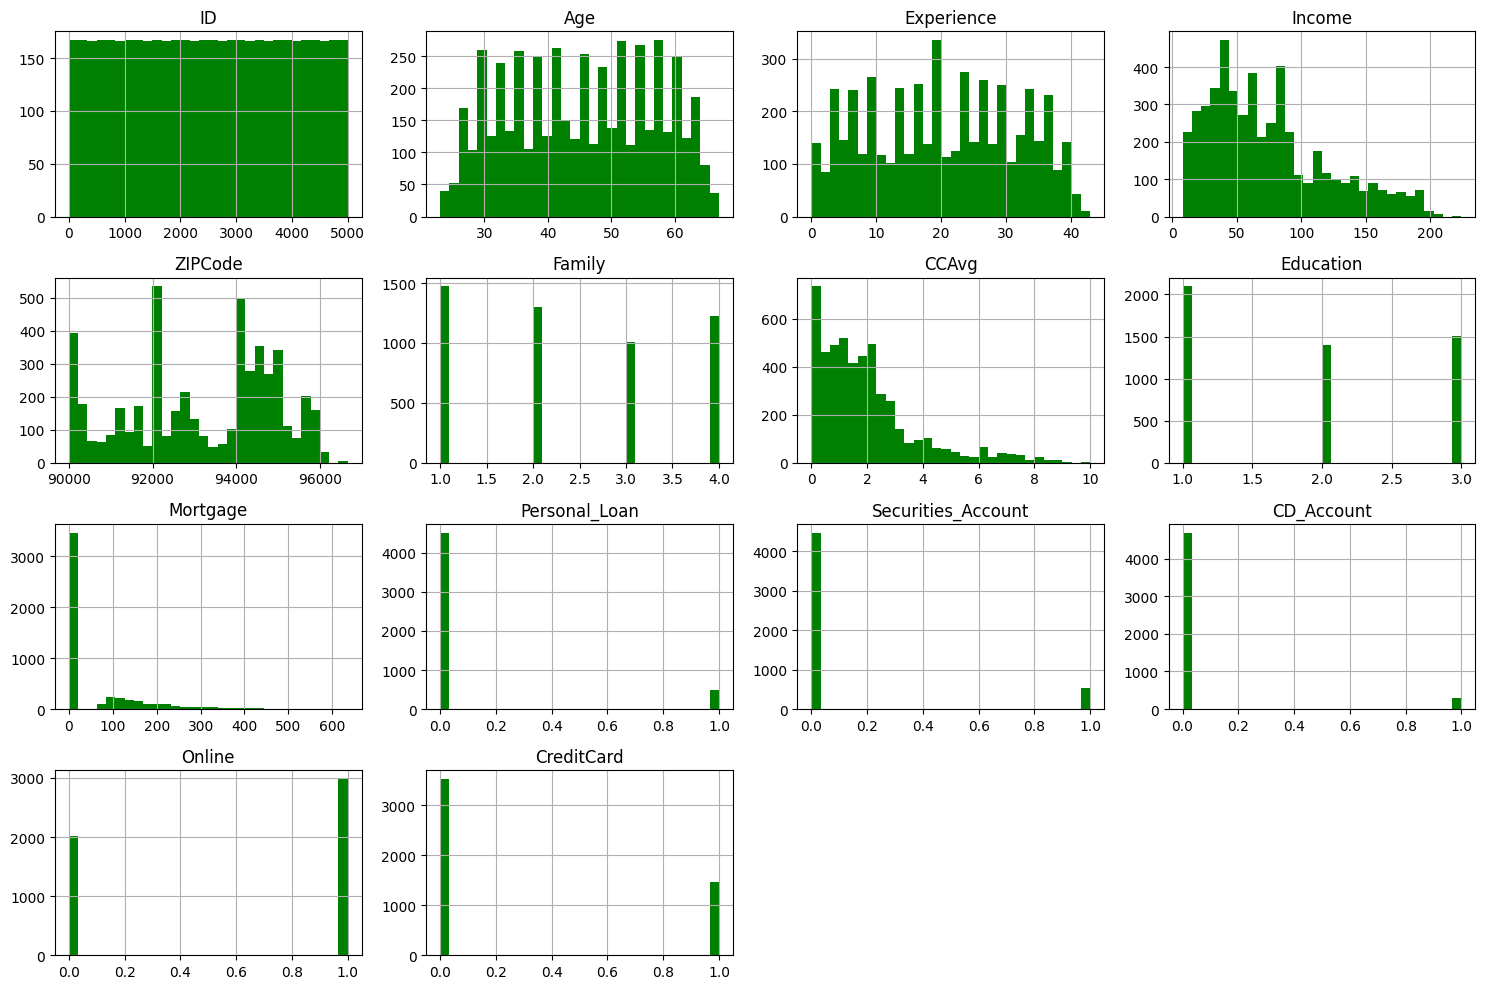

In [ ]:
# Histograms for numeric features
df.hist(bins=30, figsize=(15,10), color='green')
plt.tight_layout()
plt.show()

# Observations:
* This verifies that the CCAvg and Mortgage are indeed right skewed but also reveals that the Income is also right skewed which was missed
* Clearly shows the binary variables

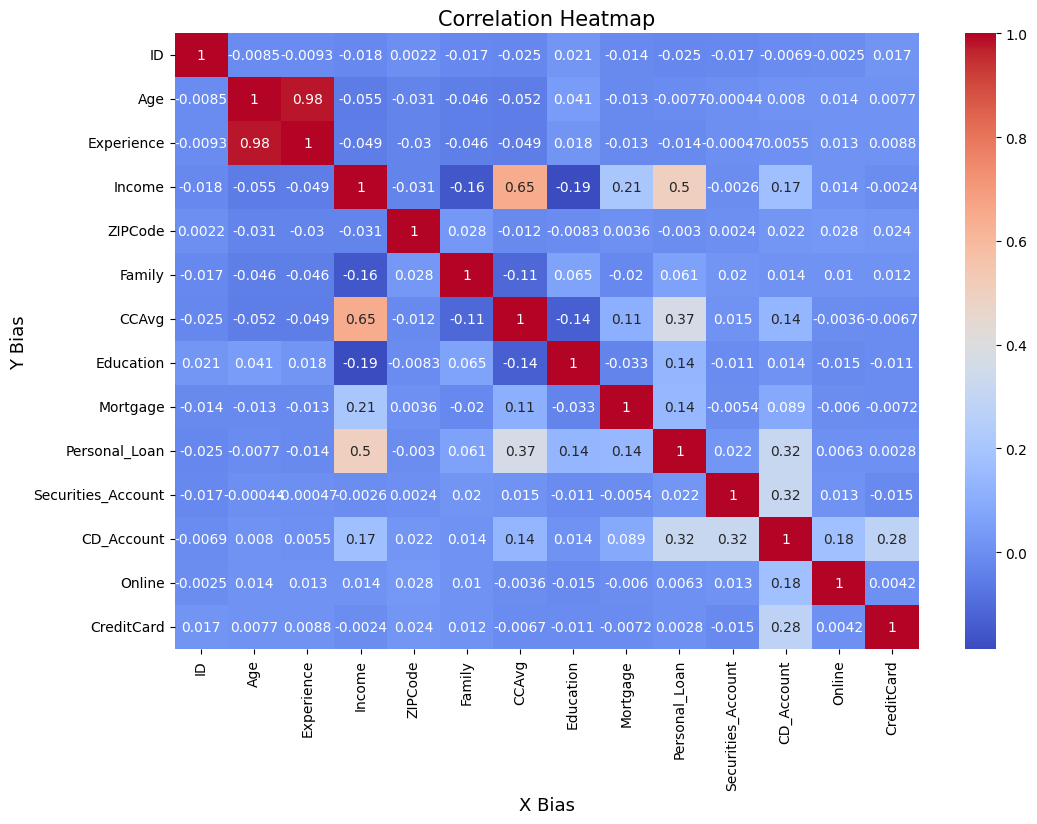

In [ ]:
# Categorica1 Correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title('Correlation Heatmap', fontsize=15)
plt.xlabel('X Bias', fontsize=13)
plt.ylabel('Y Bias', fontsize=13)
plt.show()

# Observation
* When looking at the Personal_Loam vectors the closest positive correlation is:
1. Income at 0.5
2. CCAvg at 0.37
3. CD_account at 0.32

Model should focus on key financial data points for strongest predictive linking power and drop demographic noise such as ID, Age, Experience, ZIPcode, Family, Education to meet accuracy requirements

In [ ]:
# Create boxplot
def plot_box_with_stats(df, col):
    sns.boxplot(
        x=df[col],
        boxprops=dict(facecolor='lightgreen', edgecolor='darkgreen'),
        medianprops=dict(color='black', linewidth=2),
        whiskerprops=dict(color='green'),
        capprops=dict(color='green'),
        flierprops=dict(markerfacecolor='red', marker='o', markersize=5)
    )

    plt.title(f"{col} with Quartiles", fontsize=12)

    # Calculate stats
    q1 = df[col].quantile(0.25)
    q2 = df[col].quantile(0.50)  # median
    q3 = df[col].quantile(0.75)
    min_val = df[col].min()
    max_val = df[col].max()

    # Add labels
    plt.text(q1, -0.05, f"Q1={q1:.1f}", ha='center', color='darkred',
             fontsize=12, fontweight='bold')
    plt.text(q2, 0.00, f"Median={q2:.1f}", ha='center', color='darkorange',
             fontsize=12, fontweight='bold')
    plt.text(q3, 0.05, f"Q3={q3:.1f}", ha='center', color='darkblue',
             fontsize=12, fontweight='bold')
    plt.text(min_val, -0.2, f"Min={min_val:.1f}", ha='center', color='purple',
             fontsize=12, fontweight='bold')
    plt.text(max_val, -0.2, f"Max={max_val:.1f}", ha='center', color='darkgreen',
             fontsize=12, fontweight='bold')

    plt.show()


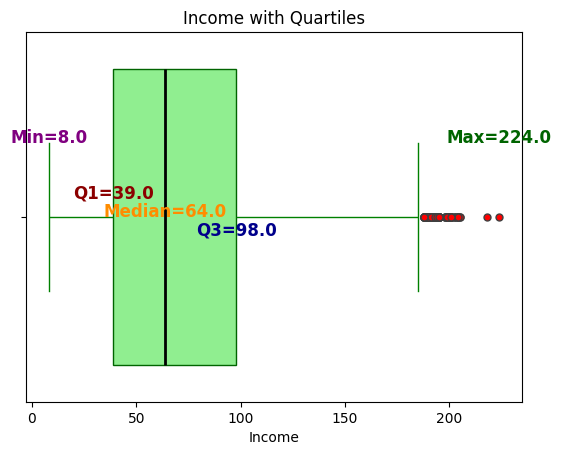

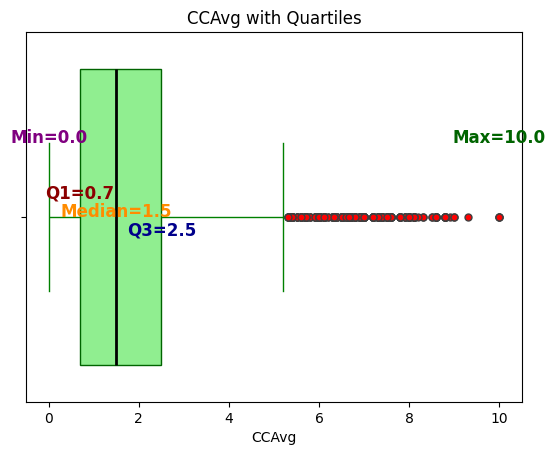

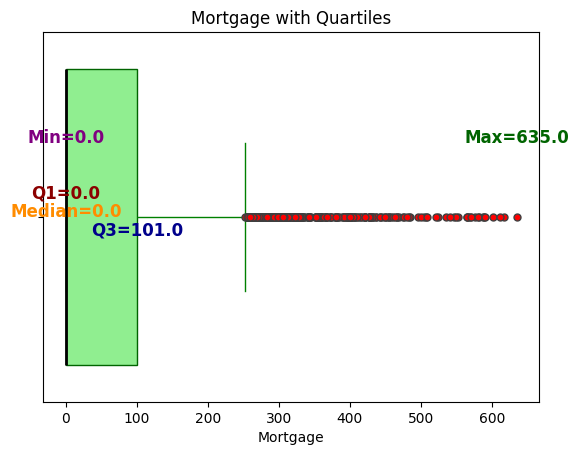

In [ ]:
# Generate boxplots
for col in ['Income', 'CCAvg', 'Mortgage']:
    plot_box_with_stats(df, col)


# Observations
* The boxplots clearly visualizes the right skewed outliers with most customers in the middle range of all three, on the high end are big earners, heavy spenders, or large mortgage holders which are the most likely to accept personal loans, so the model's predictive parameters should focus on finacial data points from this group  

---

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

# Observations
* No missing values found so no imputations needed

In [ ]:
# Drop ID and ZIPCode since they don't help prediction
df_model = df.drop(columns=['ID', 'ZIPCode'])

X = df_model.drop(columns=['Personal_Loan'])
y = df_model['Personal_Loan']

# 2) One fixed split for fair baseline comparisons
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)

* Dropped due to adding no predictive power:
  *   ID
  *   ZIPCode
  *   Family and Education (will be kept for categorical features)

* Decision Trees can handle outliers so do not need to drop but noted the skew in Income, CCAvg, and Mortgage for other models

---

# Data Prep
* **Sperate**:
  *   (X) = Features
  *   (Y) = Personal_Loans (Target Variable)
* **Data split**:
  *   Training = 70 %
  *   Testing = 30 %
* **Scaling**:
  *   Decision Trees don't need this, when using other models then i'll scale features that are skewed
* **Imbalance**:
  *   Personal_Loans 90/10 (Yes vs No) I'll handle this by class weights in the model

In [ ]:
# Show the clean list of features (X) and the target (y)
X_features = list(X.columns)
y_target = y.name

print("______________________________________")
print("\n=== Train shape ===")
print("______________________________________\n")
print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)

print("\n______________________________________")

print("\n=== Features used for training (X) ===")
print("______________________________________\n")

for col in X_features:
    print("-", col)

print("\n______________________________________")

print("\n=== Target variable (y) ===")
print("______________________________________\n")
print("-", y_target)

______________________________________

=== Train shape ===
______________________________________

Train shape: (3500, 11) (3500,)
Test shape: (1500, 11) (1500,)

______________________________________

=== Features used for training (X) ===
______________________________________

- Age
- Experience
- Income
- Family
- CCAvg
- Education
- Mortgage
- Securities_Account
- CD_Account
- Online
- CreditCard

______________________________________

=== Target variable (y) ===
______________________________________

- Personal_Loan


# Observations
* Shows the data split with 70% being the 3500 rows of data made up of 11 columns and 30% being 1500 rows of 11 columns the model will be trained and tested on respectively, otherwise listed as the Cleaned Features Dataset (X) and Target Variable Dataset (Y)

---

# Evaluation Metrics
* Decision Tree with Gini criterion, balanced, 5 fold cross validation
* Pruning with ccp_alpha training, 5 fold cross validation
* Pre and post pruning with hyper parameter tuning, 5 fold cross validation

## Model Building

* Model 1

___________________________________________________________________________________________

==== Model 1: Decision Tree Baseline (Gini, balanced, CV 5) ====
___________________________________________________________________________________________

-- 5-fold CV (on TRAIN) --

Tree depth: 17  | Leaves: 89
Balanced Accuracy (mean ± std): 0.9347 ± 0.0370
F1 (Yes=1)       (mean ± std): 0.8951 ± 0.0433
Best ccp_alpha (by CV balanced accuracy): 0.0
Positives in TEST: 144 of 1500

___________________________________________________________________________________________

==== TEST METRICS ====
___________________________________________________________________________________________

Accuracy: 0.98
Balanced Accuracy: 0.9454891838741396
ROC-AUC: 0.9454891838741396

___________________________________________________________________________________________



<Figure size 480x420 with 0 Axes>

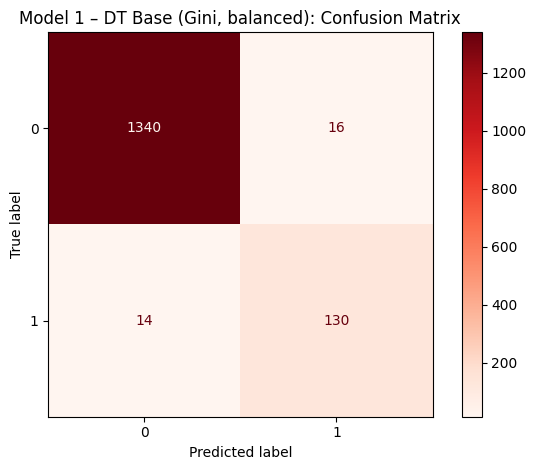


___________________________________________________________________________________________

-- Classification Report --

               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1356
           1       0.89      0.90      0.90       144

    accuracy                           0.98      1500
   macro avg       0.94      0.95      0.94      1500
weighted avg       0.98      0.98      0.98      1500



<Figure size 480x420 with 0 Axes>

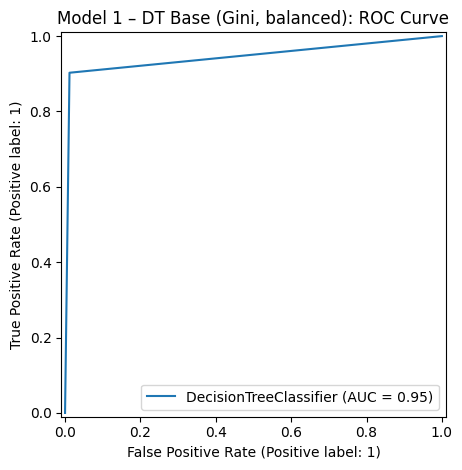

<Figure size 480x420 with 0 Axes>

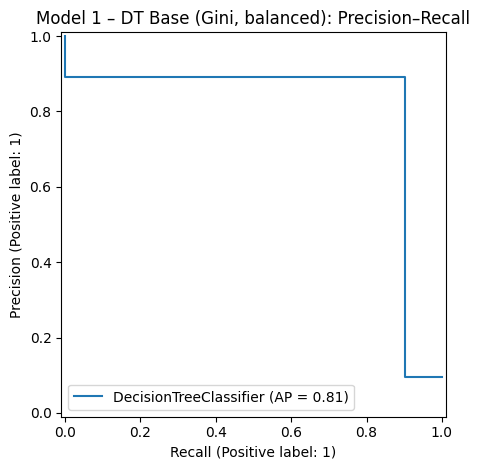


___________________________________________________________________________________________

-- Feature Importances --

 Income               0.63
Family               0.13
CCAvg                0.10
Education            0.09
Experience           0.02
Age                  0.01
CD_Account           0.01
Mortgage             0.00
CreditCard           0.00
Online               0.00
Securities_Account   0.00
dtype: float64


In [ ]:
# 1) Build the Decision Tree
dt_model = DecisionTreeClassifier(
    criterion='gini',
    class_weight='balanced',
    random_state=42
)

# 2) Cross-validation (on TRAIN only)
cv_balacc = cross_val_score(
    dt_model,
    X_train, y_train,
    cv=5,
    scoring='balanced_accuracy',
    n_jobs=-1
)

# 3) F1 for the positive class (Yes=1)
f1_pos = make_scorer(f1_score, pos_label=1, average='binary')
cv_f1pos = cross_val_score(
    dt_model,
    X_train, y_train,
    cv=5,
    scoring=f1_pos,
    n_jobs=-1
)

# 4) Fit model on full TRAIN set
dt_model.fit(X_train, y_train)

# 5) Predictions on TEST
y_pred  = dt_model.predict(X_test)
y_proba = dt_model.predict_proba(X_test)[:, 1]

# 6) Evaluation on TEST
print("___________________________________________________________________________________________")
print("\n==== Model 1: Decision Tree Baseline (Gini, balanced, CV 5) ====")
print("___________________________________________________________________________________________")
print("\n-- 5-fold CV (on TRAIN) --\n")
print("Tree depth:", dt_model.get_depth(), " | Leaves:", dt_model.get_n_leaves())
print("Balanced Accuracy (mean ± std): {:.4f} ± {:.4f}".format(cv_balacc.mean(), cv_balacc.std()))
print("F1 (Yes=1)       (mean ± std): {:.4f} ± {:.4f}".format(cv_f1pos.mean(), cv_f1pos.std()))
print("Best ccp_alpha (by CV balanced accuracy):", dt_model.ccp_alpha)
print("Positives in TEST:", int((y_test==1).sum()), "of", len(y_test))

print("\n___________________________________________________________________________________________")
print("\n==== TEST METRICS ====")
print("___________________________________________________________________________________________\n")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))
print("\n___________________________________________________________________________________________\n")
# 7) Confusion matrix (and save)
plt.figure(figsize=(4.8,4.2))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Reds")
plt.title("Model 1 – DT Base (Gini, balanced): Confusion Matrix")
plt.tight_layout();
plt.savefig("model1_dt_base_confusion.png", dpi=150);
plt.show()
print("\n___________________________________________________________________________________________")
print("\n-- Classification Report --\n\n", classification_report(y_test, y_pred))

# 8) ROC curve (and save)
plt.figure(figsize=(4.8,4.2))
RocCurveDisplay.from_estimator(dt_model, X_test, y_test)
plt.title("Model 1 – DT Base (Gini, balanced): ROC Curve")
plt.tight_layout();
plt.savefig("model1_dt_base_roc.png", dpi=150);
plt.show()

# 9) Precision–Recall curve (and save)
plt.figure(figsize=(4.8,4.2))
PrecisionRecallDisplay.from_estimator(dt_model, X_test, y_test)
plt.title("Model 1 – DT Base (Gini, balanced): Precision–Recall")
plt.tight_layout();
plt.savefig("model1_dt_base_pr.png", dpi=150);
plt.show()
print("\n___________________________________________________________________________________________")

# 10) Feature importance
fi = pd.Series(dt_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print("\n-- Feature Importances --\n\n", fi.round(4))

### Model Evaluation Criterion

* **Accuracy:** High overall at 98% but can be misleading due to 90/10 imbalance
* **Confusion Matrix:** Shows very few misclassifications FN (missed loan customers) = 14, FP (wrongly predicted loan customers) = 16
* **Precision:** About 89% of predicted (Yes) were true loan takers  
* **Recall:** Model correctly identified approx. 90% of actual loan customers
* **F1 Score:** (Yes) was 90% which shows balanced performance for minority class
* **Balanced Accuracy:** Average recall across both classes was approx. 95% which is more reliable for imbalanced data

# Observations

* The model’s accuracy is 98% but since the dataset is imbalanced balanced accuracy is more useful, balanced accuracy came out to approx. 95% (average recall of both classes) this shows the model performs strongly for both No and Yes loan customers, not just the majority class


In [ ]:
# Model 1 results data frame
row_model1 = pd.DataFrame([{
    "Model": "Decision Tree Baseline",
    "Accuracy": accuracy_score(y_test, y_pred),
    "Balanced Acc": balanced_accuracy_score(y_test, y_pred),
    "ROC-AUC": roc_auc_score(y_test, y_proba),
    "FN": ((y_test==1) & (y_pred==0)).sum(),
    "FP": ((y_test==0) & (y_pred==1)).sum()
}])

row_model1.round(4)

,Model,Accuracy,Balanced Acc,ROC-AUC,FN,FP
0,Decision Tree Baseline,0.98,0.95,0.95,14,16


### Model Building

* Model 2

___________________________________________________________________________________________

==== Model 2: Decision Tree Pruned (ccp_alpha, CV 5) ====
___________________________________________________________________________________________

-- 5-fold CV (on TRAIN) --

Tree depth: 5  | Leaves: 12
Balanced Accuracy (mean ± std): 0.9611 ± 0.0171
F1 (Yes=1)      (mean ± std): 0.8260 ± 0.0394
Best ccp_alpha (by CV balanced accuracy): 0.002154156499556314
Best CV Balanced Accuracy: 0.9610658557406879
Positives in TEST: 144 of 1500
___________________________________________________________________________________________

==== TEST METRICS ====
___________________________________________________________________________________________

Accuracy: 0.9433333333333334
Balanced Accuracy: 0.9686578171091446
ROC-AUC: 0.9946303466076696

___________________________________________________________________________________________



<Figure size 480x420 with 0 Axes>

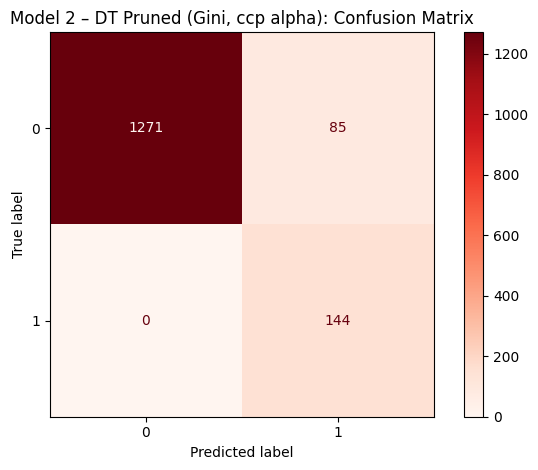


___________________________________________________________________________________________

-- Classification Report --
               precision    recall  f1-score   support

           0       1.00      0.94      0.97      1356
           1       0.63      1.00      0.77       144

    accuracy                           0.94      1500
   macro avg       0.81      0.97      0.87      1500
weighted avg       0.96      0.94      0.95      1500



<Figure size 480x420 with 0 Axes>

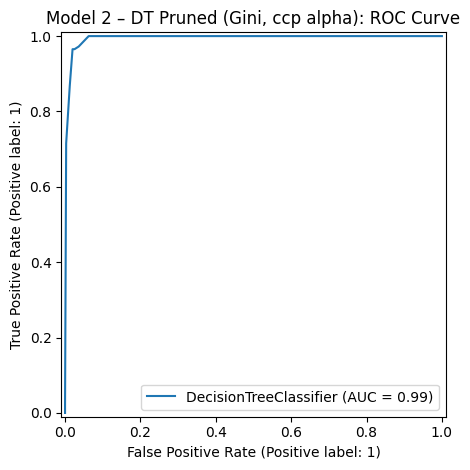

<Figure size 480x420 with 0 Axes>

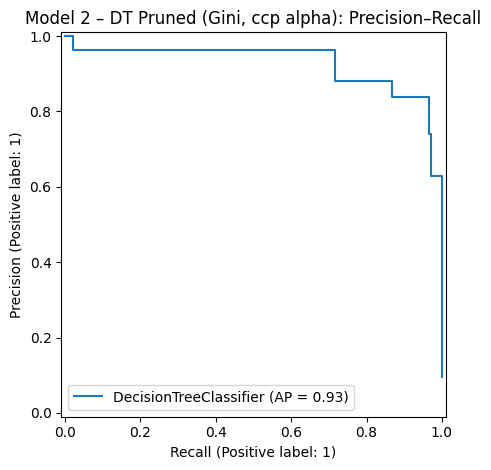


___________________________________________________________________________________________

-- Feature Importances --
 Income               0.66
Family               0.14
Education            0.10
CCAvg                0.10
CD_Account           0.00
Experience           0.00
Age                  0.00
Mortgage             0.00
Securities_Account   0.00
Online               0.00
CreditCard           0.00
dtype: float64


In [ ]:
# 1) Build the Decision Tree
tmp_tree = DecisionTreeClassifier(class_weight='balanced', random_state=42)
tmp_tree.fit(X_train, y_train)
path = tmp_tree.cost_complexity_pruning_path(X_train, y_train)

# 2) 5-fold CV across alphas (scoring = balanced accuracy)
ccp_alphas = np.unique(np.clip(path.ccp_alphas, 0, None))  # keep non-negative alphas
cv_scores = []
for a in ccp_alphas:
    clf = DecisionTreeClassifier(
        criterion='gini',
        class_weight='balanced',
        random_state=42,
        ccp_alpha=a
    )

    score = cross_val_score(
        clf, X_train, y_train,
        cv=5,
        scoring='balanced_accuracy',
        n_jobs=-1
    ).mean()
    cv_scores.append(score)

best_alpha = ccp_alphas[int(np.argmax(cv_scores))]

# 3) Define pruned model with best alpha
dt_pruned = DecisionTreeClassifier(
    criterion='gini',
    class_weight='balanced',
    random_state=42,
    ccp_alpha=best_alpha
)

# 4) 5-fold CV on the final pruned model
cv_balacc2 = cross_val_score(
    dt_pruned, X_train, y_train,
    cv=5,
    scoring='balanced_accuracy',
    n_jobs=-1
)

f1_pos = make_scorer(f1_score, pos_label=1, average='binary')
cv_f1pos2 = cross_val_score(
    dt_pruned,
    X_train, y_train,
    cv=5,
    scoring=f1_pos,
    n_jobs=-1
)

# 5) Fit model on full TRAIN set
dt_pruned.fit(X_train, y_train)

# 6) Predictions on TEST
y_pred2  = dt_pruned.predict(X_test)
y_proba2 = dt_pruned.predict_proba(X_test)[:, 1]

# 7) Evaluation on TEST
print("___________________________________________________________________________________________\n")
print("==== Model 2: Decision Tree Pruned (ccp_alpha, CV 5) ====")
print("___________________________________________________________________________________________")

print("\n-- 5-fold CV (on TRAIN) --\n")
print("Tree depth:", dt_pruned.get_depth(), " | Leaves:", dt_pruned.get_n_leaves())
print("Balanced Accuracy (mean ± std): {:.4f} ± {:.4f}".format(cv_balacc2.mean(), cv_balacc2.std()))
print("F1 (Yes=1)      (mean ± std): {:.4f} ± {:.4f}".format(cv_f1pos2.mean(), cv_f1pos2.std()))
print("Best ccp_alpha (by CV balanced accuracy):", best_alpha)
print("Best CV Balanced Accuracy:", np.max(cv_scores))
print("Positives in TEST:", int((y_test==1).sum()), "of", len(y_test))

print("___________________________________________________________________________________________\n")
print("==== TEST METRICS ====")
print("___________________________________________________________________________________________\n")

print("Accuracy:", accuracy_score(y_test, y_pred2))
print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred2))
print("ROC-AUC:", roc_auc_score(y_test, y_proba2))
print("\n___________________________________________________________________________________________\n")

# 8) Confusion matrix (and save)
plt.figure(figsize=(4.8,4.2))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred2, cmap="Reds")
plt.title("Model 2 – DT Pruned (Gini, ccp alpha): Confusion Matrix")
plt.tight_layout();
plt.savefig("model2_dt_pruned_confusion.png", dpi=150);
plt.show()
print("\n___________________________________________________________________________________________\n")

print("-- Classification Report --\n", classification_report(y_test, y_pred2))

# 9) ROC curve (and save)
plt.figure(figsize=(4.8,4.2))
RocCurveDisplay.from_estimator(dt_pruned, X_test, y_test)
plt.title("Model 2 – DT Pruned (Gini, ccp alpha): ROC Curve")
plt.tight_layout();
plt.savefig("model2_dt_pruned_roc.png", dpi=150);
plt.show()

# 10) Precision–Recall curve (and save)
plt.figure(figsize=(4.8,4.2))
PrecisionRecallDisplay.from_estimator(dt_pruned, X_test, y_test)
plt.title("Model 2 – DT Pruned (Gini, ccp alpha): Precision–Recall")
plt.tight_layout();
plt.savefig("model2_dt_pruned_pr.png", dpi=150);
plt.show()
print("\n___________________________________________________________________________________________\n")

# 11) Feature importance
print("-- Feature Importances --\n", pd.Series(dt_pruned.feature_importances_, index=X_train.columns).round(4).sort_values(ascending=False))

### Model Evaluation Criterion

* **Accuracy:** Overall at 94.3% this is a much lower than the base model
* **Confusion Matrix:** Shows no misclassifications at all FN (missed loan customers) = 0, wasted efforts are very high FP (wrongly predicted loan customers) = 85
* **Precision:** About 63% of predicted (Yes) were true loan takers significantly lower  
* **Recall:** Model correctly identified 100% of actual loan customers
* **F1 Score:** (Yes) was 77% which shows poor performance for minority class
* **Balanced Accuracy:** Average recall across both classes was approx. 97% being approx. a 2% increase

# Observations

* The Pruned model’s accuracy is dropped at 94.3% although excelling at finding all customers with 100% recall the 63% precision is hidden wasting bank investments with 85 "spammed" customers wrongly predicting loan takers, balanced accuracy came out to approx. 97% this 2% would suggest an increase in the models performance with the majority classes although the feature importance shows that only 4 of the 11 actual features had any weights calculated


In [ ]:
# Model 2 results data frame
row_model2 = pd.DataFrame([{
    "Model": "Decision Tree Pruned",
    "Accuracy": accuracy_score(y_test, y_pred2),
    "Balanced Acc": balanced_accuracy_score(y_test, y_pred2),
    "ROC-AUC": roc_auc_score(y_test, y_proba2),
    "FN": ((y_test==1) & (y_pred2==0)).sum(),
    "FP": ((y_test==0) & (y_pred2==1)).sum()
}])

row_model2.round(4)

,Model,Accuracy,Balanced Acc,ROC-AUC,FN,FP
0,Decision Tree Pruned,0.94,0.97,0.99,0,85


### Model Building

* Model 3

___________________________________________________________________________________________

==== Model 3: Decision Tree Tuned (Gini, pre+post, CV 5) ====
___________________________________________________________________________________________

-- 5-fold CV (on TRAIN) --

Tree depth: 17  | Leaves: 89
Balanced Accuracy (mean ± std): 0.9347 ± 0.0370
F1 (Yes=1)      (mean ± std): 0.8951 ± 0.0433
Best Parameters: {'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best CV F1 (Yes): 0.8950591558438203
Positives in TEST: 144 of 1500
___________________________________________________________________________________________

==== TEST METRICS ====
___________________________________________________________________________________________

Accuracy: 0.98
Balanced Accuracy: 0.9454891838741396
ROC-AUC: 0.9454891838741396

___________________________________________________________________________________________

<Figure size 480x420 with 0 Axes>

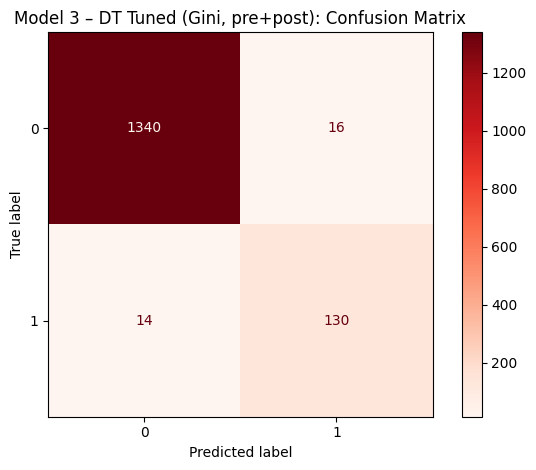


___________________________________________________________________________________________

-- Classification Report --
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1356
           1       0.89      0.90      0.90       144

    accuracy                           0.98      1500
   macro avg       0.94      0.95      0.94      1500
weighted avg       0.98      0.98      0.98      1500



<Figure size 480x420 with 0 Axes>

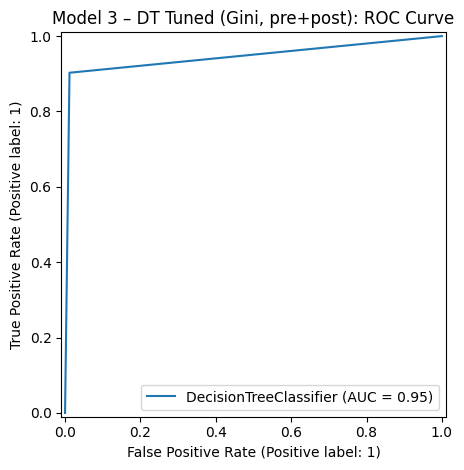

<Figure size 480x420 with 0 Axes>

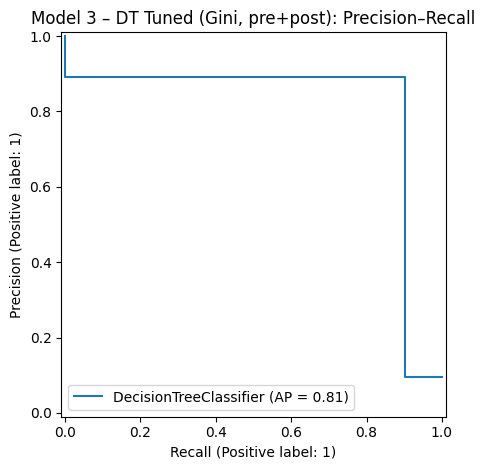


___________________________________________________________________________________________

-- Feature Importances --
 Income               0.63
Family               0.13
CCAvg                0.10
Education            0.09
Experience           0.02
Age                  0.01
CD_Account           0.01
Mortgage             0.00
CreditCard           0.00
Online               0.00
Securities_Account   0.00
dtype: float64


In [ ]:
# 1) Define scoring: F1 for Yes class
f1_pos = make_scorer(f1_score, pos_label=1)

# 2) Parameter grid (pre-pruning + post-pruning)
param_grid = {
    "criterion": ["gini"],            # keep consistent
    "class_weight": ["balanced"],     # handle imbalance
    "max_depth": [3, 5, 7, 9, None],  # tree depth
    "min_samples_split": [2, 5, 10],  # minimum samples to split
    "min_samples_leaf": [1, 2, 5],    # minimum samples per leaf
    "ccp_alpha": [0.0, 0.0005, 0.001, 0.002, 0.005]  # pruning strength
}

# 3) GridSearchCV with 5-fold CV (optimize for F1 of the Yes class)
dt = DecisionTreeClassifier(random_state=42)
grid_dt = GridSearchCV(
    dt, param_grid,
    scoring=f1_pos,
    refit=True,        # refit best model using the same scorer
    cv=5,
    n_jobs=-1,
)

grid_dt.fit(X_train, y_train)

# 4) Best model from CV
dt_tuned = grid_dt.best_estimator_

# --- 5-fold CV on the final tuned model (same metrics you used) ---
cv_balacc3 = cross_val_score(
    dt_tuned, X_train, y_train,
    cv=5, scoring='balanced_accuracy', n_jobs=-1
)
cv_f1pos3 = cross_val_score(
    dt_tuned, X_train, y_train,
    cv=5, scoring=f1_pos, n_jobs=-1
)

# 5) Fit tuned model on full TRAIN (explicit for clarity)
dt_tuned.fit(X_train, y_train)

# 6) Predictions on TEST
y_pred3  = dt_tuned.predict(X_test)
y_proba3 = dt_tuned.predict_proba(X_test)[:, 1]

# 7) Evaluation on TEST
print("___________________________________________________________________________________________\n")
print("==== Model 3: Decision Tree Tuned (Gini, pre+post, CV 5) ====")
print("___________________________________________________________________________________________")

print("\n-- 5-fold CV (on TRAIN) --\n")
print("Tree depth:", dt_tuned.get_depth(), " | Leaves:", dt_tuned.get_n_leaves())
print("Balanced Accuracy (mean ± std): {:.4f} ± {:.4f}".format(cv_balacc3.mean(), cv_balacc3.std()))
print("F1 (Yes=1)      (mean ± std): {:.4f} ± {:.4f}".format(cv_f1pos3.mean(), cv_f1pos3.std()))
print("Best Parameters:", grid_dt.best_params_)
print("Best CV F1 (Yes):", grid_dt.best_score_)
print("Positives in TEST:", int((y_test==1).sum()), "of", len(y_test))

print("___________________________________________________________________________________________\n")
print("==== TEST METRICS ====")
print("___________________________________________________________________________________________\n")

print("Accuracy:", accuracy_score(y_test, y_pred3))
print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred3))
print("ROC-AUC:", roc_auc_score(y_test, y_proba3))
print("\n___________________________________________________________________________________________\n")

# 8) Confusion matrix (and save)
plt.figure(figsize=(4.8,4.2))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred3, cmap="Reds")
plt.title("Model 3 – DT Tuned (Gini, pre+post): Confusion Matrix")
plt.tight_layout();
plt.savefig("model3_dt_tuned_confusion.png", dpi=150);
plt.show()
print("\n___________________________________________________________________________________________\n")

print("-- Classification Report --\n", classification_report(y_test, y_pred3))

# 9) ROC curve (and save)
plt.figure(figsize=(4.8,4.2))
RocCurveDisplay.from_estimator(dt_tuned, X_test, y_test)
plt.title("Model 3 – DT Tuned (Gini, pre+post): ROC Curve")
plt.tight_layout();
plt.savefig("model3_dt_tuned_roc.png", dpi=150);
plt.show()

# 10) Precision–Recall curve (and save)
plt.figure(figsize=(4.8,4.2))
PrecisionRecallDisplay.from_estimator(dt_tuned, X_test, y_test)
plt.title("Model 3 – DT Tuned (Gini, pre+post): Precision–Recall")
plt.tight_layout();
plt.savefig("model3_dt_tuned_pr.png", dpi=150);
plt.show()
print("\n___________________________________________________________________________________________\n")

# 11) Feature importance
print("-- Feature Importances --\n",
      pd.Series(dt_tuned.feature_importances_, index=X_train.columns)
        .round(4).sort_values(ascending=False))

### Model Evaluation Criterion

* **Accuracy:** The model returned the original 98% even with hyperparameter tuning
* **Confusion Matrix:** Identical results FN (missed loan customers) = 14, FP (wrongly predicted loan customers) = 16
* **Precision:** About 89% of predicted (Yes) were true loan takers  
* **Recall:** Model correctly identified 90% of actual loan customers
* **F1 Score:** (Yes) was 90% which shows balanced precision and recall
* **Balanced Accuracy:** Consistant with Model 1 returning 95%

# Observations

* The model is stable overall with accuracy at 98% and balanced accuracy at 95%, Hyperparameter tuning confirmed the baseline model was already well-optimized


In [ ]:
# Model 3 results data frame
row_model3 = pd.DataFrame([{
    "Model": "Decision Tree Tuned",
    "Accuracy": accuracy_score(y_test, y_pred3),
    "Balanced Acc": balanced_accuracy_score(y_test, y_pred3),
    "ROC-AUC": roc_auc_score(y_test, y_proba3),
    "FN": ((y_test==1) & (y_pred3==0)).sum(),
    "FP": ((y_test==0) & (y_pred3==1)).sum()
}]).round(4)
row_model3


,Model,Accuracy,Balanced Acc,ROC-AUC,FN,FP
0,Decision Tree Tuned,0.98,0.95,0.95,14,16


## Model Performance Improvement Comparison

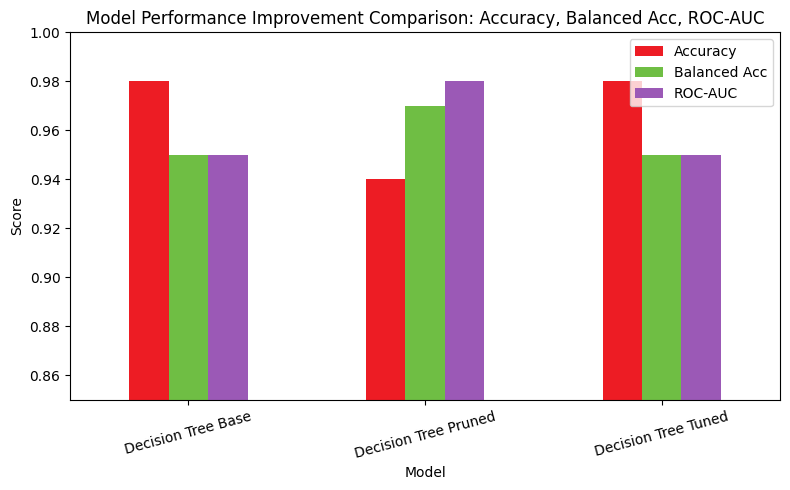

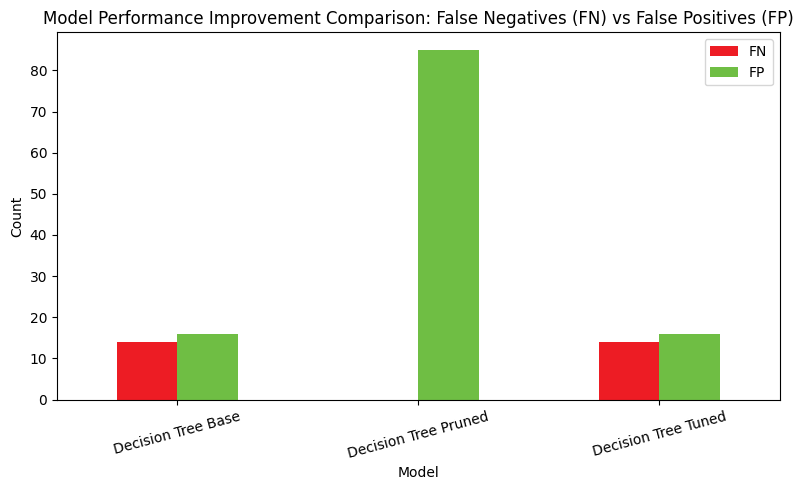

,Model,Accuracy,Balanced Acc,ROC-AUC,FN,FP
0,Decision Tree Base,0.98,0.95,0.95,14,16
1,Decision Tree Pruned,0.94,0.97,0.98,0,85
2,Decision Tree Tuned,0.98,0.95,0.95,14,16


In [ ]:
# Combine results from all 3 models
results_df = pd.DataFrame([
    {"Model": "Decision Tree Base", "Accuracy": 0.98, "Balanced Acc": 0.95, "ROC-AUC": 0.95, "FN": 14, "FP": 16},
    {"Model": "Decision Tree Pruned",   "Accuracy": 0.94, "Balanced Acc": 0.97, "ROC-AUC": 0.98, "FN":  0, "FP": 85},
    {"Model": "Decision Tree Tuned",    "Accuracy": 0.98, "Balanced Acc": 0.95, "ROC-AUC": 0.95, "FN": 14, "FP": 16}
])

# Bar plot for Accuracy, Balanced Acc, ROC-AUC
results_df.set_index("Model")[["Accuracy","Balanced Acc","ROC-AUC"]].plot(
    kind="bar", figsize=(8,5), color=["#ed1c24","#6fbe44","#9b59b6"], rot=15
)
plt.title("Model Performance Improvement Comparison: Accuracy, Balanced Acc, ROC-AUC")
plt.ylabel("Score")
plt.ylim(0.85, 1.0)
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()

# FN / FP comparison highlight error trade-offs
results_df.set_index("Model")[["FN","FP"]].plot(
    kind="bar", figsize=(8,5), color=["#ed1c24","#6fbe44"], rot=15
)
plt.title("Model Performance Improvement Comparison: False Negatives (FN) vs False Positives (FP)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Results data frame of all three models
display(results_df.round(3))

## Model Performance Comparison and Final Model Selection

In [ ]:
# Create comparison data frame
comparison_df = pd.concat([row_model1, row_model2, row_model3], ignore_index=True)

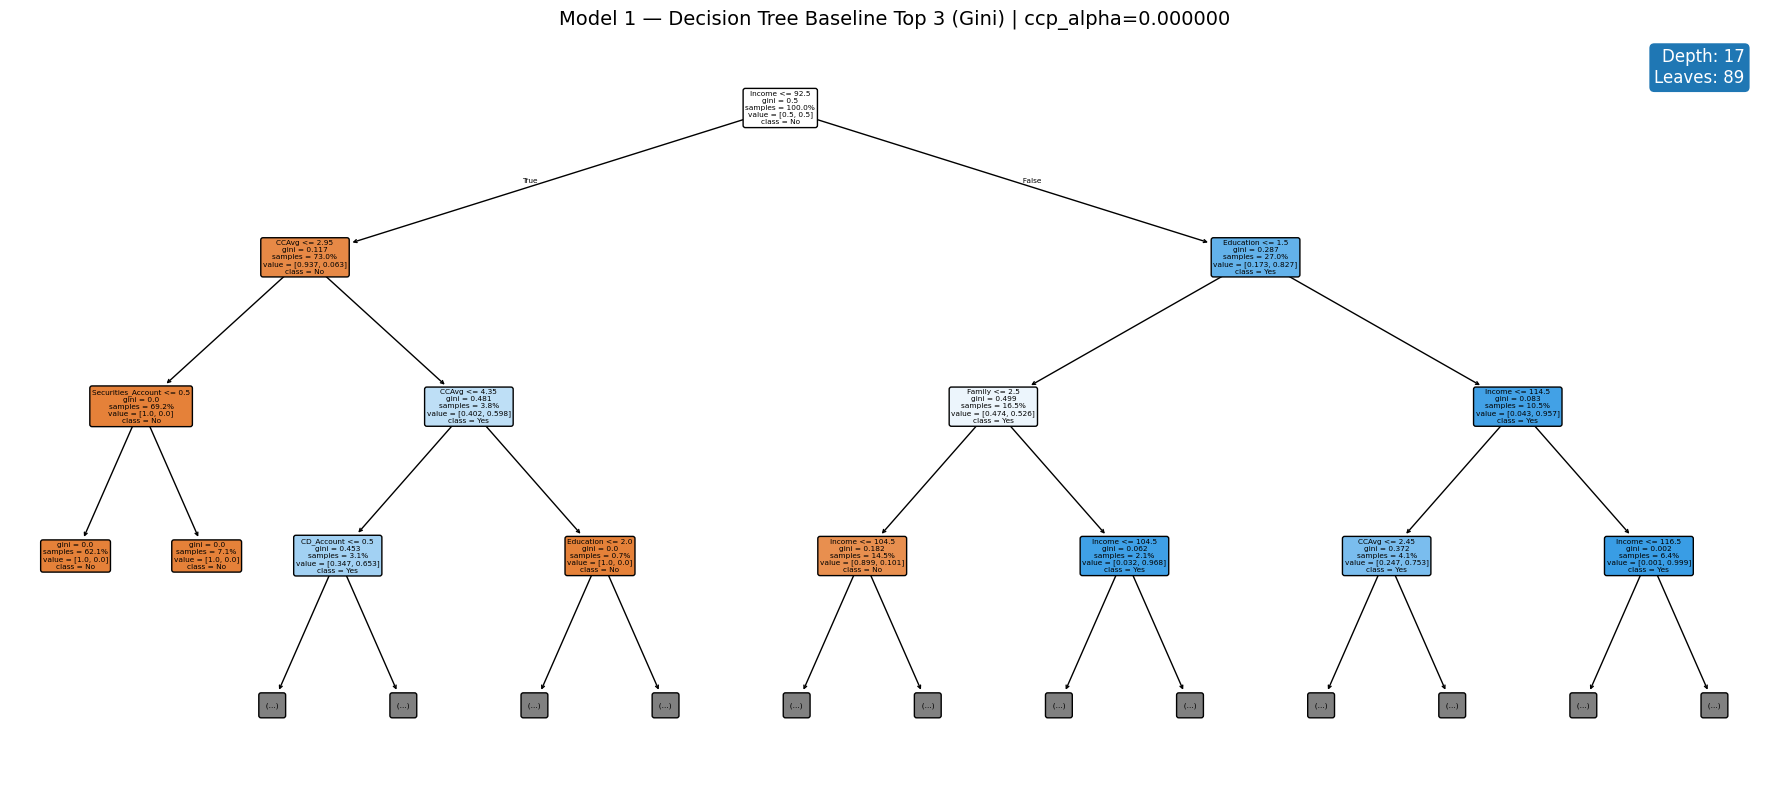

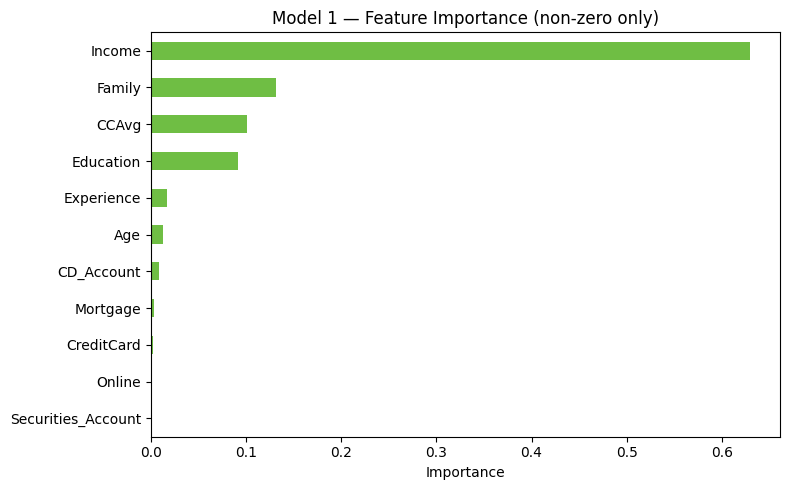

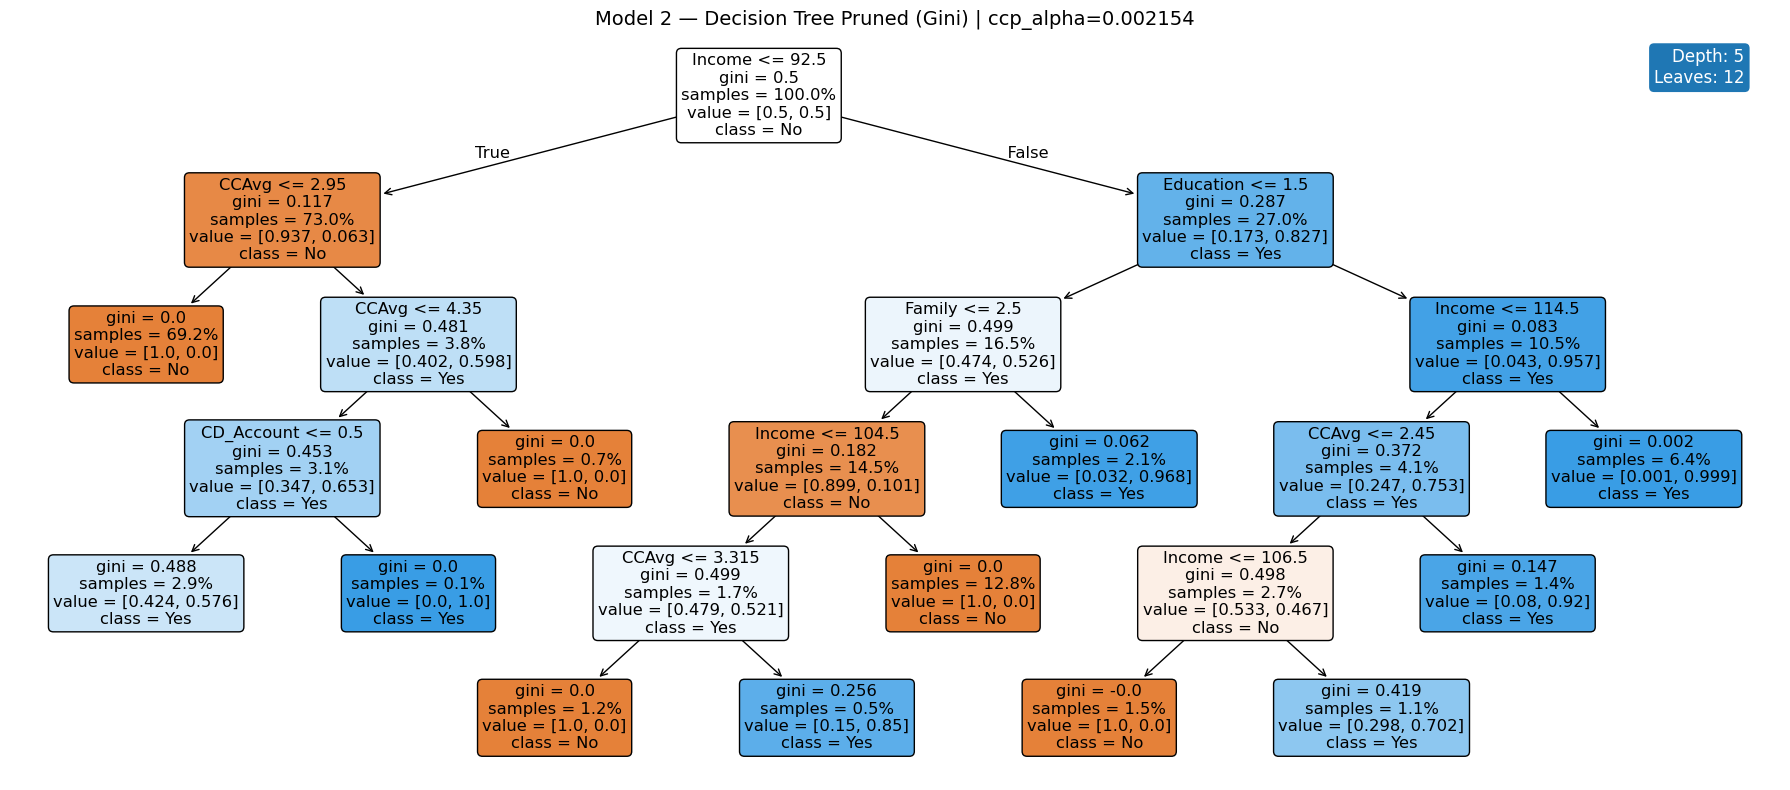

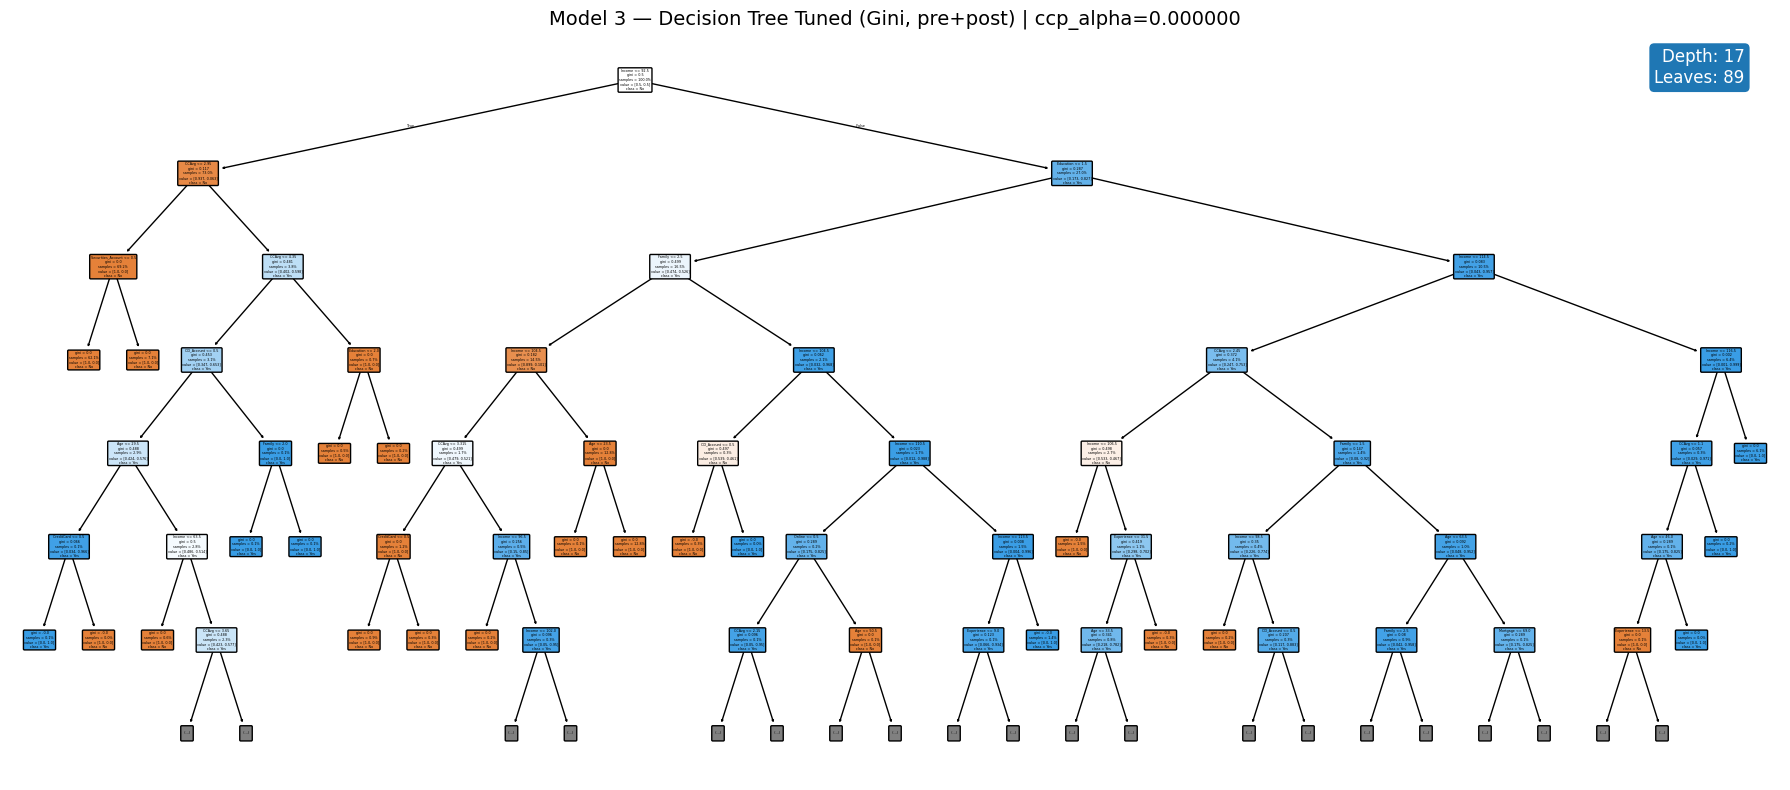

In [ ]:
# Plot a tree with a depth and leaves badge
def plot_tree_with_badge(model, title, max_show_depth=6):
    plt.figure(figsize=(18, 8))
    tree.plot_tree(
        model,
        feature_names=X_train.columns,
        class_names=["No", "Yes"],
        filled=True, rounded=True, proportion=True,
        max_depth=max_show_depth
    )
    plt.title(title, fontsize=14)

    # badge for depth & leaves
    depth  = model.get_depth()
    leaves = model.get_n_leaves()
    plt.text(
        0.98, 0.98, f"Depth: {depth}\nLeaves: {leaves}",
        transform=plt.gca().transAxes,
        ha="right", va="top", fontsize=12, color="white",
        bbox=dict(boxstyle="round,pad=0.3", fc="#1f77b4", ec="none")
    )
    plt.tight_layout()
    plt.show()


# Model 1 — Baseline
plot_tree_with_badge(
    dt_model,
    title=f"Model 1 — Decision Tree Baseline Top 3 (Gini) | ccp_alpha={getattr(dt_model,'ccp_alpha',0.0):.6f}",
    max_show_depth=3   # truncate to show top 3 levels only
)

# Baseline feature importance only features that contributed (non-zero)
fi_base = (pd.Series(dt_model.feature_importances_, index=X_train.columns)
             .loc[lambda s: s > 0]                       # keep only contributors
             .sort_values(ascending=True))

plt.figure(figsize=(8, 5))
fi_base.plot(kind="barh", color="#6fbe44")               # AllBank green
plt.title("Model 1 — Feature Importance (non-zero only)")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()


# Model 2 — Pruned
plot_tree_with_badge(
    dt_pruned,
    title=f"Model 2 — Decision Tree Pruned (Gini) | ccp_alpha={getattr(dt_pruned,'ccp_alpha',0.0):.6f}"
    # leave default max_show_depth (6) or change if you want full depth view
)


# Model 3 — Tuned as-is to show complexity
plot_tree_with_badge(
    dt_tuned,
    title=f"Model 3 — Decision Tree Tuned (Gini, pre+post) | ccp_alpha={getattr(dt_tuned,'ccp_alpha',0.0):.6f}"
)

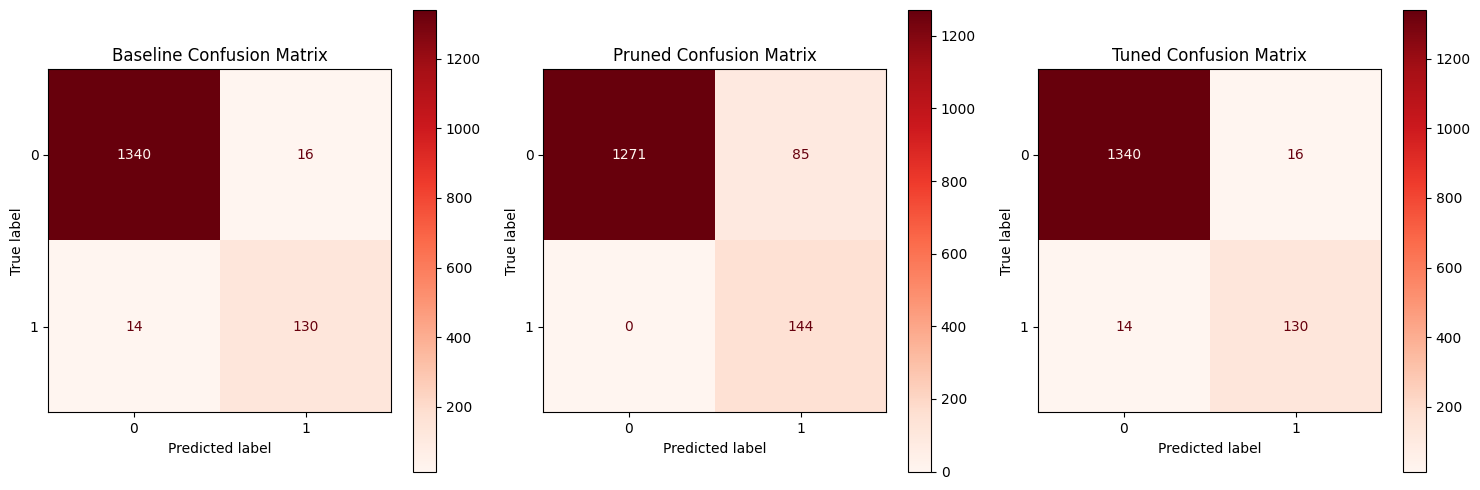

In [ ]:
# Build Confusion Matrix comparison tables
fig, axes = plt.subplots(1, 3, figsize=(15,5))

for ax, (name, y_pred) in zip(
    axes,
    [("Baseline", y_pred), ("Pruned", y_pred2), ("Tuned", y_pred3)]
):
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Reds", ax=ax)
    ax.set_title(f"{name} Confusion Matrix")

plt.tight_layout()
plt.show()

# Final Assessment



* The three models evaluation comparison displayed the viablity and limitations of each. The project directly shows how subtle changes have underlying affects that translates to real world results.

* Initially the Base Model 1 showed high performance having 98% accuracy and 95% balanced accuracy, this however showed signs of overfitting with a complex tree depth of 17 with 89 leaves. Feature importance confirmed that only Income, Family, CCAvg, and Education drove most of those splits, even when all variables were considered.

* The second approch in Pruned Model 2 was to simplfy the tree structure yeilding a depth of 5 with 12 leaves. This increased the balanced accuracy to 97% but droped the accuracy to 94%. It achieved 100% recall finding all of the loan takers at the expense of 85 false positive missclassifications, this is a classic example of over pruning.

* In the Tuned Model 3 pre and post pruning hyperparameter optimization was applied through GridSearchCV. This revealed that the Base Model was already the best optimized model with the all of the same results.

## In Conclusion

* The model achieves 95% of balanced accuracy with the Base and Tuned models with a (90/10) class imbalance. Which leads me to believe the data is the limit since even when excelling in the Pruned model at 97% the Base model is better  optimized.

* Real world application I would look for another method to continue training the model possibly a Random Forest or XGBoost model.

---

## Actionable Insights and Business Recommendations


* What recommedations would you suggest to the bank?

### Key Predictors:
  *   Income
  *   CCAvg

The strongest predictors of loan acceptance

---

### AllLife Bank should:

  *   Income and CCAvg show that higher-earning, higher-spending customers are more likely to accept loans. Family and Education suggest household size and education level also play a role in loan interest.

  *   Offer premium loans to top customers and smaller loans to lower-income groups this expands their portfolio

  *   Explore more robust models such as Random Forest or XGBoost for stronger performance

  *   Balance the dataset (90/10) and add new features like repayment history or savings to improve predictions performance



___